## Raising Exceptions

There are two aspects with respect to program errors: detection and handling.  A prgram might, for example, detect an error when processing input and then handle the error by either prompting for input or assuming a default value.

In most languages, exception handling provides a flexible mechanism for passing control from a point of error detection to a level where the error can be handled.  This can easily be done by raising a specific exception type that can subsequently be caught and processed by an exception handler.

The Python library provides a number of standard exceptions to signal all sorts of conditions.  The figure below illustrates the exception class hierary provided by Python.  A description of each class can be found at https://docs.python.org/3/library/exceptions.html

When a program raises an exception, execution does not continue with the next statement but with an appropriate exception handler.  The code can not return to the point of the exception (this is referred to as a "termination model").

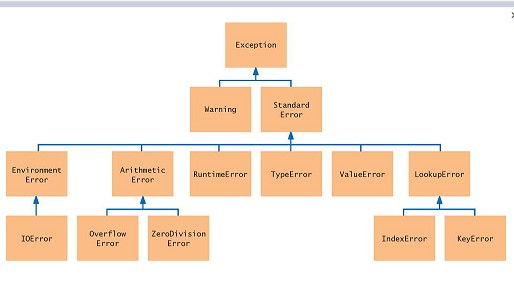

## Handling Exceptions

Every exception should be handled somewhere in the program.  If the exception type has no exception handler defined, an error message and stack trace is printed and the program is terminated as illustrated above.

To handle exceptions, a <b>try</b> block is defined containing any statements that may raise an exception.  The associated exception handlers must immediately follow the try: block.  The keyword <b>except</b> is used to identify an exception handler.  

In [ ]:
def withdrawal(balance, amt):
    if amt > balance:
        raise ValueError("Withdrawal amount exceeds balance")
    else:
        return True
    
withdrawal(100, 300)

Python implements the termination model for exception handling.  However, we can encapsulate the try...except in a loop.

In [ ]:
success = False
while success == False:
    bal = input("enter balance")
    w = input("enter withdrawal amount")
    try:
        success = withdrawal(bal, w)
    except ValueError as e:
        print(e.args)

In [2]:
inp = input('Enter Fahrenheit Temperature:')
try:
    fahr = float(inp)
    cel = (fahr - 32.0) * 5.0 / 9.0
    print(cel)
except:
    print('Please enter a number')
    
print("thank you!")


Enter Fahrenheit Temperature: aaa


Please enter a number
thank you!


## The finally Clause

Some times the code needs to take action whether or not an exception is raised.  The <b>finally</b> construct is used to handle is often used as illustrated below.

In [ ]:
try:
    infile = open("input.txt","r")
    
    # process input file
    
except IOError:
    print("Could not open input file")
    
except Exception as exceptObj:
    print("Error: ", str(exceptObj))

In [ ]:
def writeData(outfile):
    pass

outfile = open("outfile.txt", "w")
try:
    writeData(outfile)
    
finally:
    print("close all files")
    outfile.close()

## Defining Custom Exception Classes

Python provides quite a few built-in exception classes, however, you may have specific needs that are not adequately described by the predefined exception class names.  And so, you can create custom exception classes by inheriting from a built-in exception class (like the class <b>Exception</b>) and defining the class with whatever needed attributes and methods.

In [ ]:
class E(Exception):
    def __init__(self, s):
        self.m = s
        
    def __str__(self):
        return self.m

def withdrawal(balance, amt):
    if amt > balance:
        raise E("Withdrawal amount exceeds balance")

try:        
    withdrawal(100, 300)
    
except E as e:
    print(f"dectected exception {str(e)}")